In [151]:
import pandas as pd
import missingno as msno
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, robust_scale
import pickle

In [152]:
import scipy.stats

In [153]:
df=pd.read_csv("/home/apprenant/Documents/DATA/data_assurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


<AxesSubplot:>

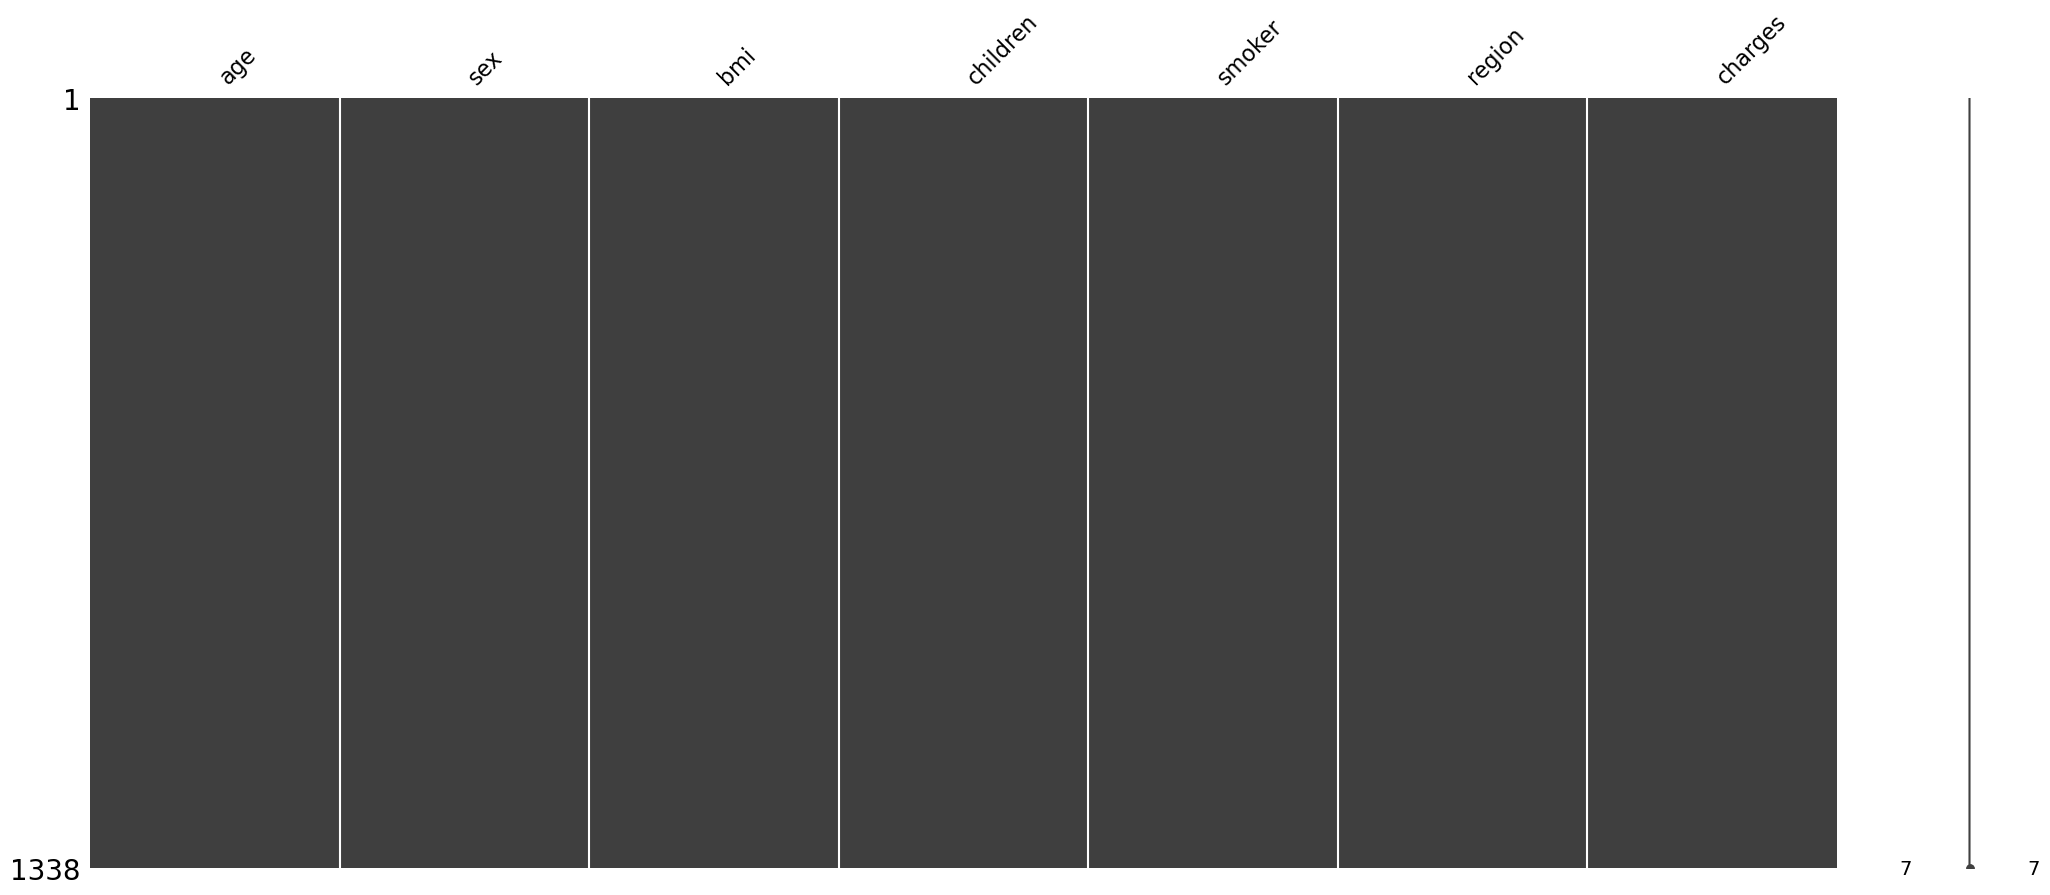

In [154]:
msno.matrix(df)

In [155]:
mask = df.isnull()
mask

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [156]:
missing_values_count = mask.sum()
missing_values_count

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [157]:
df.loc[df.duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.5631
581,19,male,30.59,0,no,northwest,1639.5631


In [158]:
VALID_REGION = ['southwest', 'southeast', 'northwest', 'northeast']
mask = ~df['region'].isin(VALID_REGION)
df.loc[mask, 'region'] = np.NaN


/tmp/ipykernel_28603/2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<AxesSubplot:xlabel='age', ylabel='Density'>

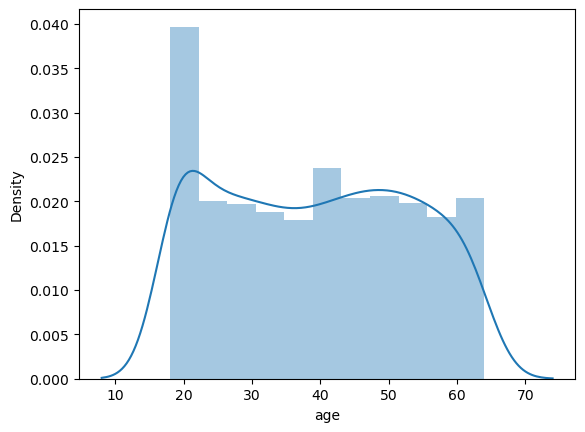

In [159]:
sns.distplot(df.age)

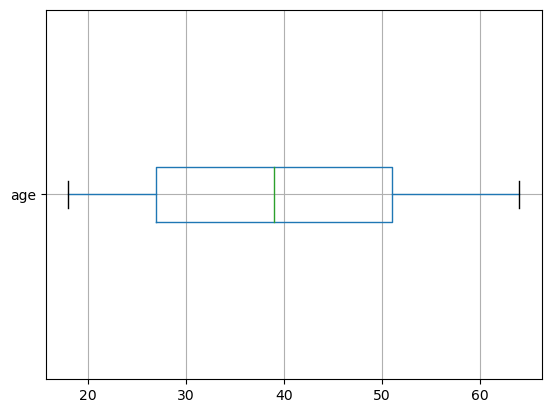

In [160]:
df.boxplot(column="age", vert=False)
plt.show()

In [161]:
df.age.describe()

count    1338.000000
mean       39.207025
std        14.049960
min        18.000000
25%        27.000000
50%        39.000000
75%        51.000000
max        64.000000
Name: age, dtype: float64

In [162]:
shapiro_results = scipy.stats.shapiro(df['age'].values)
shapiro_results

ShapiroResult(statistic=0.9446989893913269, pvalue=5.687060076887153e-22)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal


/tmp/ipykernel_28603/3450038586.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.charges)


<AxesSubplot:xlabel='charges', ylabel='Density'>

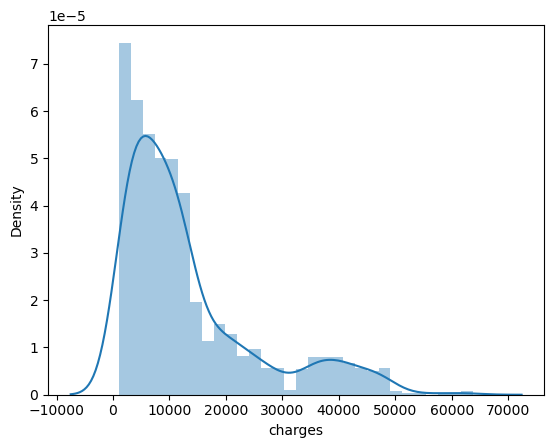

In [163]:
sns.distplot(df.charges)

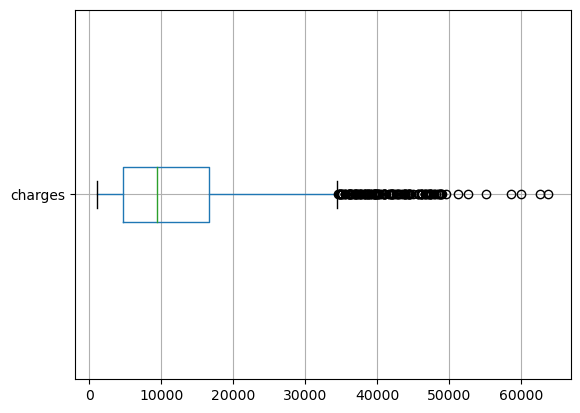

In [164]:
df.boxplot(column="charges", vert=False)
plt.show()

In [165]:
df.charges.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [166]:
shapiro_results = scipy.stats.shapiro(df['charges'].values)
shapiro_results

ShapiroResult(statistic=0.8146880865097046, pvalue=1.1505194006561963e-36)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

In [167]:
# df['log_charges'] = np.log(df['charges'])


In [168]:
# sns.distplot(df.log_charges)

In [169]:
# shapiro_results = scipy.stats.shapiro(df['log_charges'].values)
# shapiro_results

/tmp/ipykernel_28603/2420122515.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.bmi)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

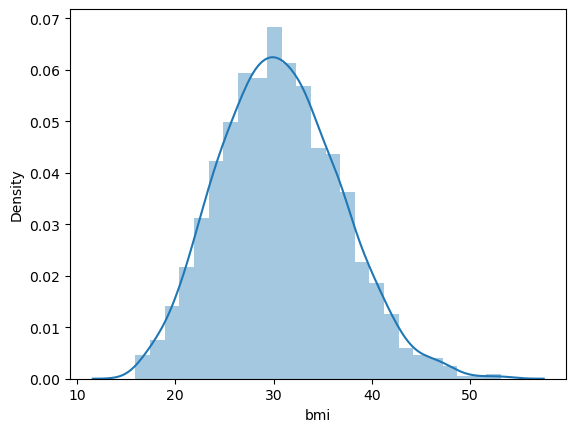

In [170]:
sns.distplot(df.bmi)

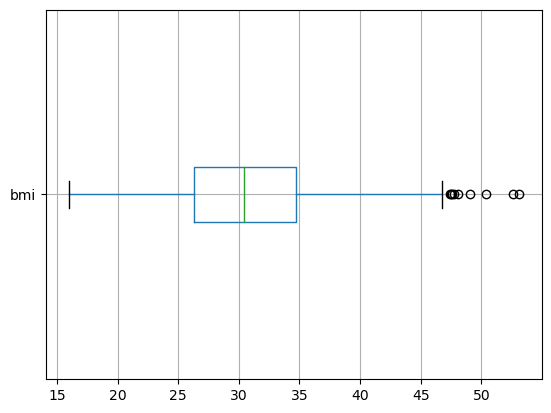

In [171]:
df.boxplot(column="bmi", vert=False)
plt.show()

In [172]:
df.bmi.describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [173]:
shapiro_results = scipy.stats.shapiro(df['bmi'].values)
shapiro_results

ShapiroResult(statistic=0.9938861727714539, pvalue=2.6033414542325772e-05)

nous pouvons voir que le pvalue<0.05 donc la distribution n'est pas normal

<AxesSubplot:title={'center':'Analyse univariée de la variable sexe'}, ylabel='sex'>

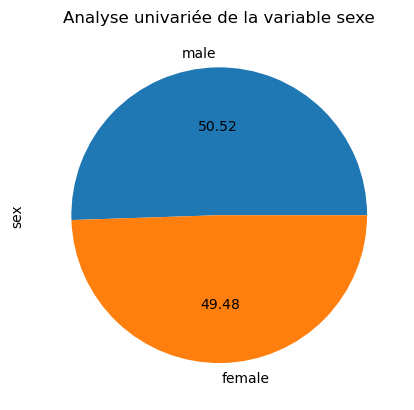

In [174]:
freq_genre = df.sex.value_counts(normalize=True)

plt.title('Analyse univariée de la variable sexe')
freq_genre.plot(kind="pie",autopct='%.2f')

<AxesSubplot:title={'center':'Analyse univariée de la variable fumeur'}, ylabel='smoker'>

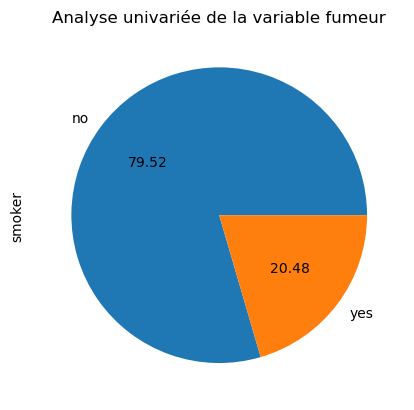

In [175]:
freq_smoker = df.smoker.value_counts(normalize=True)



plt.title('Analyse univariée de la variable fumeur')
freq_smoker.plot(kind="pie",autopct='%.2f')

<AxesSubplot:title={'center':'Analyse univariée de la variable region'}, ylabel='region'>

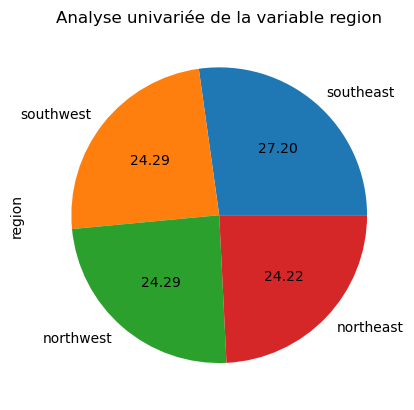

In [176]:
freq_region = df.region.value_counts(normalize=True)



plt.title('Analyse univariée de la variable region')
freq_region.plot(kind="pie",autopct='%.2f')

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
0    42.899851
1    24.215247
2    17.937220
3    11.733931
4     1.868460
5     1.345291
Name: children, dtype: float64


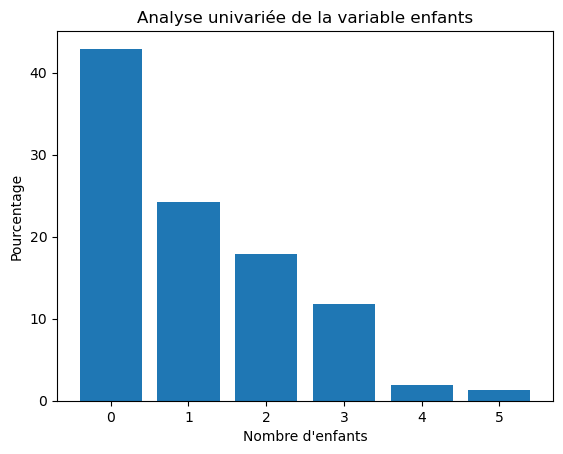

In [177]:
# Calculer la fréquence
frequency = df['children'].value_counts()

# Calculer le pourcentage
percentage = df['children'].value_counts(normalize=True)*100

# Afficher les résultats
print(frequency)
print(percentage)

# Créer le graphique 
plt.bar(frequency.index, percentage)
plt.xlabel('Nombre d\'enfants')
plt.ylabel('Pourcentage')
plt.title('Analyse univariée de la variable enfants')
plt.show()

In [178]:
df_continue = df[["age","bmi","charges"]]

In [179]:

charges_corr = df_continue.corr()['charges'].sort_values() 

print(charges_corr) 

bmi        0.198341
age        0.299008
charges    1.000000
Name: charges, dtype: float64


In [180]:
df['sex_binary'] = df['sex'].apply(lambda x: 1 if x == 'male' else 0)

In [181]:
len(df.charges)

1338

In [182]:
len(df.sex_binary)

1338

In [183]:
df.sex_binary.value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       1
2       1
3       1
4       1
       ..
1333    1
1334    0
1335    0
1336    0
1337    0
Name: sex_binary, Length: 1338, dtype: int64>

In [184]:
scipy.stats.pearsonr(df.charges, df.sex_binary)

PearsonRResult(statistic=0.057292062202025346, pvalue=0.03613272100594507)

In [185]:
scipy.stats.pearsonr(df.charges, df.children)

PearsonRResult(statistic=0.06799822684790481, pvalue=0.012852128520141125)

In [186]:
df['smoker_binary'] = df['smoker'].apply(lambda x: 1 if x == 'no' else 0)

In [187]:
scipy.stats.pearsonr(df.charges, df.smoker_binary)

PearsonRResult(statistic=-0.7872514304984775, pvalue=8.271435842176839e-283)

In [188]:
df['region_num'] = df['region'].map({'northwest':1,'northeast':2,'southeast':3,'southwest':4})


In [189]:
scipy.stats.pearsonr(df.charges, df.region_num)

PearsonRResult(statistic=0.011740854806590255, pvalue=0.6678661746775458)


### Partie modélisation :


Dans vos variables explicatives Si les distributions ne sont pas normales, appliquer une transformation logarithmique.
Pensez à fixer le hasard grâce à seeds et des random states.
Étant donné que la variable à prédire est continue, c’est un problème de régression. Je vous conseille d’utiliser les algorithmes suivants : régression linéaire, Lasso, Ridge et ElasticNet. Sklearn dispose d’implémentation pour chacun de ses modèles. Comparer vos modèles à l'aide du R2 et du RMSE.
Si vous avez besoin d’effectuer du pré-traitement des données (standardisation, encodage des données catégorielles, etc.) Je te conseille de passer par un pipeline avec sklearn.
Analysez vos résultats avec une approche statistique grâce à ce cours : https://openclassrooms.com/fr/courses/4525326-realisez-des-modelisations-de-donnees-performantes
Étant donné que vous disposez de peu de variables vous pouvez essayer de booster vos résultats grâce à un PolynomialFeature.
Sélectionner vos hyperparamètres grâce à des GridSearchCV et RandomSearchCV.
Sélectionner votre modèle ayant les meilleurs résultats et interpréter vos résultats, par exemple : quels sont les variables les plus importantes pour votre modèle.



In [190]:
df=pd.read_csv("/home/apprenant/Documents/DATA/data_assurance.csv")


In [191]:
X = df.drop(['charges'], axis=1)
y = df['charges']

In [192]:
# Remplacer 'bmi' par le nom de votre colonne de BMI et 'df' par le nom de votre DataFrame
bmi = X['bmi']

# Définissez les bornes de chaque catégorie de BMI
bins = [0, 18.5, 25, 30, 35, 40, float('inf')]

# Utilisez la fonction 'cut' pour transformer les valeurs de BMI en catégories
bmi_categories = pd.cut(bmi, bins, labels=['Underweight', 'Normal weight', 'Overweight', 'Obese Class I', 'Obese Class II', 'Obese Class III'])

# Ajoutez la colonne de catégories de BMI à votre DataFrame
X['bmi'] = bmi_categories

In [193]:
# X["children"]=X["children"].replace({0:"zero",1:'one',2:'two',3:'three',4:'Four',5:'five'})


In [194]:

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42)
dummy = DummyRegressor()
X_train.head()
dummy.fit(X_train, y_train)
dummy.score(X_test, y_test)

-0.0009192486886582252

In [195]:
X 

,age,sex,bmi,children,smoker,region
0,19,female,Overweight,0,yes,southwest
1,18,male,Obese Class I,1,no,southeast
2,28,male,Obese Class I,3,no,southeast
3,33,male,Normal weight,0,no,northwest
4,32,male,Overweight,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,Obese Class I,3,no,northwest
1334,18,female,Obese Class I,0,no,northeast
1335,18,female,Obese Class II,0,no,southeast
1336,21,female,Overweight,0,no,southwest


In [196]:
from sklearn.model_selection import cross_val_score

In [197]:
#X_encoder=pd.get_dummies(X)

In [198]:
from sklearn.pipeline import Pipeline,FeatureUnion,make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import GridSearchCV


cols_to_encode = [ "sex","smoker", "bmi"]
cols_to_norm = [ "age","children"]
preprocessor = ColumnTransformer(
    [('Encoder',  OneHotEncoder() , cols_to_encode),('scaler',  RobustScaler() , cols_to_norm)],

)



In [199]:
X_train.shape

(1070, 6)

### LinearRegression

In [200]:
model =make_pipeline(preprocessor, LinearRegression())
model.fit(X_train,y_train)

cross_val_score(model, X_train, y_train ).mean()

0.7392717923519051

In [201]:
y_pred = model.predict(X_train)

residual =(y_pred-y_train).abs()



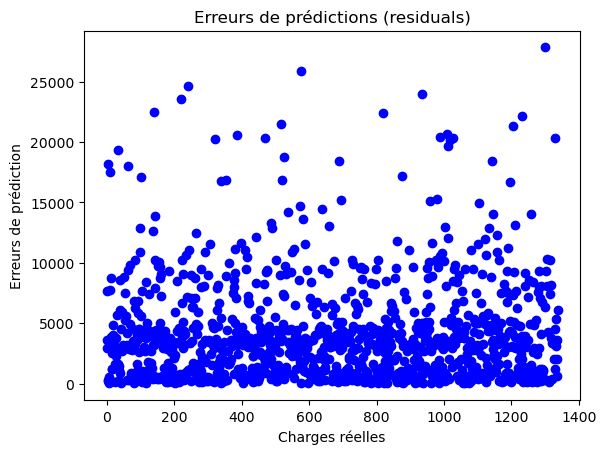

In [202]:


plt.scatter(y_train.index, residual, color="blue")
plt.title("Erreurs de prédictions (residuals)")
plt.xlabel("Charges réelles")
plt.ylabel("Erreurs de prédiction")
plt.show()
# Filter the residuals greater than 20000 



In [203]:
# Filter the residuals greater than 20000 
residual_to_drop = residual[residual> 15000].index
residual_to_drop

Int64Index([1142,  140,  526,  987,  355, 1008,  321,  242, 1328,    3,   62,
               9,  936,  516,  468, 1230,  688, 1027,  340,  696, 1206,  819,
             876,  102, 1195,  980, 1019,  959, 1300,  219, 1012,  577,  520,
              34,  387],
           dtype='int64')

In [204]:
X_train_new = X_train.drop(residual_to_drop)
y_train_new = y_train.drop(residual_to_drop)


In [205]:
# from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# from math import sqrt

# rmse = sqrt(mean_squared_error(y_test,y_pred))

# print("Root Mean Squared Error (RMSE): {}".format(rmse))

# MAE = mean_absolute_error(y_test, y_pred)

# print('Le score de MAE est :',MAE)

In [206]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
 
model_linear = make_pipeline(preprocessor, PolynomialFeatures(),LinearRegression())
params = {
    'polynomialfeatures__degree':[1,2,3],
}

grid_linear = GridSearchCV(model_linear, params, cv=5)
grid_linear.fit(X_train_new, y_train_new)
print(grid_linear.best_params_)
print(grid_linear.best_score_)
print(grid_linear.score(X_train_new,y_train_new))



{'polynomialfeatures__degree': 2}
0.9278013354294539
0.9353241963327719


In [207]:
grid_linear.score(X_test,y_test)

0.8867527681113132

### Lasso


In [208]:

from sklearn.linear_model import Lasso
model = Lasso(alpha= 42, fit_intercept = True)

model.fit(X_train,y_train)
model.score(X_train,y_train)

ValueError: could not convert string to float: 'female'

In [ ]:
model.score(X_test,y_test)

0.7810502630356021

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range (2,15):
    model = make_pipeline(PolynomialFeatures(),Lasso())
    params = {
        'polynomialfeatures__degree':[1,2,3],
        'lasso__alpha':[37,38,39]
    }

    grid = GridSearchCV(model, params, cv=i)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))

{'lasso__alpha': 37, 'polynomialfeatures__degree': 3}
0.8543764296025851
0.8647332575532254
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.855613751440312
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 3}
0.8530394004257162
0.8647332575532254
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8535734439661802
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8548241890209636
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8546424846429275
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8524465025186281
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8522098826181597
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8528496431894638
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8514246637966821
0.8636426413239799
{'lasso__alpha': 37, 'polynomialfeatures__degree': 2}
0.8524683162972929
0.863642

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
model = Ridge(alpha= 42, fit_intercept = True)

model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

0.7386803240697465
0.7682368686712414


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
for i in range(2,15):
    model = make_pipeline(PolynomialFeatures(),Ridge())
    params = {
        'polynomialfeatures__degree':[1,2,3],
        'ridge__alpha':[7,8,9]}

    grid = GridSearchCV(model, params, cv=i)
    grid.fit(X_train, y_train)
    print(grid.best_params_)
    print(grid.best_score_)
    print(grid.score(X_train,y_train))
    print(grid)

{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8444066635360608
0.8666351042262996
GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [7, 8, 9]})
{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8456962002630176
0.8666351042262996
GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [7, 8, 9]})
{'polynomialfeatures__degree': 2, 'ridge__alpha': 7}
0.8460547543143009
0.8666351042262996
GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures'

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet
model = ElasticNet( alpha=0.05, l1_ratio=0.9)
model.fit(X_train,y_train)
print(model.score(X_train,y_train))
print(model.score(X_test,y_test))

NameError: name 'prepocessing' is not defined

In [ ]:
X_train_new

,age,sex,bmi,children,smoker
560,46,female,Normal weight,2,no
1285,47,female,Normal weight,0,no
969,39,female,Obese Class I,5,no
486,54,female,Normal weight,3,no
170,63,male,Obese Class III,0,no
...,...,...,...,...,...
1095,18,female,Obese Class I,4,no
1130,39,female,Normal weight,5,no
1294,58,male,Overweight,0,no
860,37,female,Obese Class III,2,yes


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(),ElasticNet())
params = {
    'polynomialfeatures__degree':[1,2,3],
    'elasticnet__alpha':[7,8,9,10],
    'elasticnet__l1_ratio': [0,0.5,1]
}

grid_elasticnet = GridSearchCV(model_elasticnet, params, cv=5)
grid_elasticnet.fit(X_train_new, y_train_new)
print(grid_elasticnet.best_params_)
print(grid_elasticnet.best_score_)
print(grid_elasticnet.score(X_train_new,y_train_new))


/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.285e+10, tolerance: 1.096e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/home/apprenant/miniconda3/envs/data_analyse_env/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.007e+10, tolerance: 1.037e+07 Linear regression models with null weight for the l1 regularization term are more ef

{'elasticnet__alpha': 8, 'elasticnet__l1_ratio': 1, 'polynomialfeatures__degree': 2}
0.9287121660093245
0.9349967750503624


In [ ]:
grid_elasticnet.score(X_test,y_test)

0.8869887382743871

In [ ]:
grid_elasticnet.predict(X_test)

array([ 8886.15780229,  6242.54119682, 30131.21674829,  9902.5386488 ,
       34444.75238277,  5638.6937716 ,  2488.70242379, 15229.3135818 ,
        3520.44069617, 10812.93236346, 18220.11315591,  8257.30718653,
        4433.01098044, 45557.37424122, 49538.3433002 , 43739.75899499,
       10782.13670175, 43028.2419345 ,  8725.55223907, 22906.71504637,
        5516.5860861 ,  8804.11672162,  2659.45996391,  3339.15760585,
       10880.56917154, 11525.41643536, 14030.60596911,  5508.51965443,
        9484.07477772,  2514.49254076,  8406.06371964, 12578.05633747,
        3192.83634507,  5812.06023986,  3976.13584665,  8551.8582957 ,
        2959.53345567,  7853.27116101, 24060.78488494, 39869.54294561,
        4483.92531361,  3639.16273765, 13411.83067393, 12534.28914842,
        7308.1586858 , 13088.67258765,  4019.95118388,  4834.01095121,
       43268.21617337,  6851.21250666, 15210.790945  ,  2663.36473198,
        7777.78817799,  2108.98129275, 11865.44411445, 10890.11079011,
      

### modele de xgboost

In [ ]:
import xgboost as xgb

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures


model_elasticnet = make_pipeline(preprocessor, PolynomialFeatures(),xgb.XGBRegressor())
params = {
    'polynomialfeatures__degree':[1,2],
    'xgbregressor__learning_rate': np.linspace(0.01,0.1,10),
    'xgbregressor__max_depth': [3,4],
    #'xgbregressor__n_estimators': [150,190,240],
}
grid = GridSearchCV(model_elasticnet, params, cv=5)
grid.fit(X_train_new, y_train_new)
print(grid.best_params_)
print(grid.best_score_)
print(grid.score(X_train_new,y_train_new))
print(grid)

cross_val_score(grid, X_train_new, y_train_new ).mean()

NameError: name 'xgb' is not defined

In [ ]:
model = make_pipeline(
    preprocessor,PolynomialFeatures(degree=2), xgb.XGBRegressor(learning_rate= 0.095,max_depth=2)
)
# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train_new, y_train_new)

# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)
# Calculer le coefficient de détermination (R2)
r2 = r2_score(y_pred, y_test)
print(model.score(X_train_new, y_train_new))
print("R2: %.4f" % r2)

0.9132047857011788
R2: 0.8124


In [ ]:
pickle_out = open("modelelastic.pkl", "wb") 
pickle.dump(grid_elasticnet, pickle_out) 
pickle_out.close()